***UNIT 1 Coding Assignment***

In [474]:
"""Name: Kinzie Bailey
    Unit 1 
    BIOL 672

    The following code displays our imports, for use in future questions
    All scripts written in VScode, with Windows/Chrome linux VM as the OS
    Used languages: python 3.7.9
    Files: Unit_1_Notebook_KB.ipynb : The current notebook! 
        fighter_stance_tko.csv: Data loaded in for Q4 from Kaggle
        heart_failure_clinical_records_dataset.csv: Data loaded in for Q7 from Kaggle
        iris_csv.data: iris dataset (original)
        iris_tab_bgnoise.txt: corrupted iris file with a lot of background noise
        iris_tab_smnoise.txt: corrupted iris file with some background noise
        iris_tab_no_setosa.txt: corrupted iris file with no setosa data

    Please note: This notebook is written to run with all files in the same directory
    """


import os

import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import researchpy as rp

from pingouin import ancova

import random
from statistics import mean, pstdev

from scipy.stats import f_oneway, kruskal, pearsonr, spearmanr, kstest

from statsmodels.multivariate.manova import MANOVA

from statsmodels.stats.rates import test_poisson_2indep

from plotnine import ggplot, aes, geom_line

#Import models from scikit learn module:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


**Question 2:** Random Dataset stats and plots

In [475]:
#First we will generate a random dataset with 5000 values. We will assign random numbers to be between 0 and 100
data = []
for i in range(5000):
    rand = random.randrange(0, 100)
    data.append(rand)
#The above loop uses randrange to fill our list with 5000 random entries between 0 and 100. As this is a pseudorandom number generator, these are not TRULY random, but we will work with it
#Next, we extract and print the mean and standard deviation 
mn = mean(data)
print(mn)
sd = pstdev(data)
print(sd)

49.6626
29.19775267447822


Next, we will make our plots: 

C:\Users\kinzi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot:ylabel='Density'>

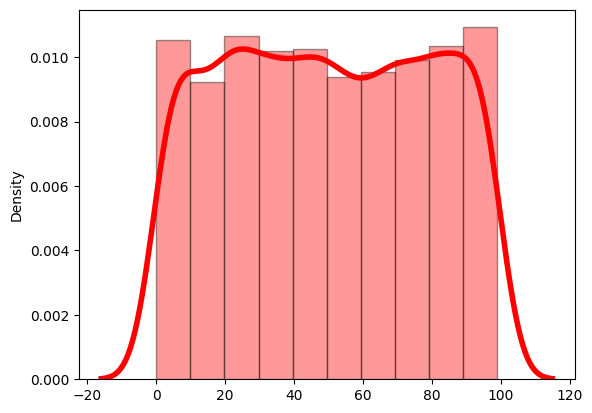

In [476]:

q2plot = sns.distplot(data, hist=True, kde=True, bins=int(100/10), color='red', kde_kws={'linewidth': 4}, hist_kws={'edgecolor':'black'})
q2plot

**Question 3:** *Mostly focused on R, though we are opting to work in python, so we will simply write code to create a text file with our mean/stdev  

In [477]:
with open('desc.txt', 'w') as outp:
    outp.write("Mean: " + str(mn))
    outp.write('\n')
    outp.write("Standard Deviation: " + str(sd))

**Question 4** One Way Anova on a sample dataset. For this, we will import a fighter stance vs total knock out dataset from Kaggle. 

Download the dataset here: https://www.kaggle.com/datasets/vusalkamalzada/ufc-fighter-vs-tko-ratio/

In [478]:
#We will read this data into a pandas dataframe. 

df = pd.read_csv('fighter_stance_tko.csv', header=0)
#Extract the two columns SLpM (Significant Strikes Landed per minute) and tko_win_ratio as relevant data for one way Anova, as per data publisher suggestion 
dropcols = ['name', 'last_name', 'stance', 'wins', 'losses', 'fights']
df = df.drop(columns=dropcols)
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)
print(df)

     SLpM  tko_win_ratio
0    1.35           0.62
1    2.53           0.40
2    3.84           0.36
3    2.97           0.22
4    3.10           0.36
..    ...            ...
627  1.05           0.00
628  5.43           0.40
629  4.65           0.33
630  5.02           0.67
631  5.47           0.20

[632 rows x 2 columns]


In [479]:
df['qbin'] = pd.qcut(df['SLpM'], 3)
df.info

<bound method DataFrame.info of      SLpM  tko_win_ratio            qbin
0    1.35           0.62  (-0.001, 2.81]
1    2.53           0.40  (-0.001, 2.81]
2    3.84           0.36   (3.787, 8.26]
3    2.97           0.22   (2.81, 3.787]
4    3.10           0.36   (2.81, 3.787]
..    ...            ...             ...
627  1.05           0.00  (-0.001, 2.81]
628  5.43           0.40   (3.787, 8.26]
629  4.65           0.33   (3.787, 8.26]
630  5.02           0.67   (3.787, 8.26]
631  5.47           0.20   (3.787, 8.26]

[632 rows x 3 columns]>

In [480]:
intv1_list = []
intv2_list = []
intv3_list = []
for interval in df['qbin']:
    if interval == df['qbin'][0]:
        intv1_list.append(1)
        intv2_list.append(0)
        intv3_list.append(0)
    elif interval == df['qbin'][3]:
        intv1_list.append(0)
        intv2_list.append(1)
        intv3_list.append(0)
    else:
        intv1_list.append(0)
        intv2_list.append(0)
        intv3_list.append(1)
#All lists passed expected print test. Now outputting to column:
 
temp = pd.DataFrame(list(zip(intv1_list, intv2_list, intv3_list)), columns=['(< 2.81)', '(2.81 - 3.787)', '(> 3.787)'])
temp


,(< 2.81),(2.81 - 3.787),(> 3.787)
0,1,0,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
627,1,0,0
628,0,0,1
629,0,0,1
630,0,0,1


This looks good, let's join it to our other dataframe and drop our qbin column (after doing our boxplot for simplicity sake)

In [481]:
#Now we will conduct the one-way anova:
f_oneway(df['SLpM'], df['tko_win_ratio'])

F_onewayResult(statistic=3445.458066722067, pvalue=0.0)

This indicates a heavily significant correlation in the data. Let's map it to a histogram. To start, we will bin our dataframe: 

<AxesSubplot:xlabel='qbin', ylabel='tko_win_ratio'>

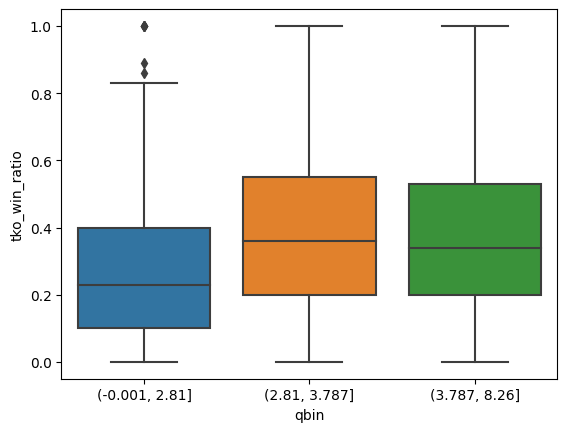

In [482]:
#Name each bin, run anova on binned data
sns.boxplot(x='qbin', y='tko_win_ratio', data=df)

This box plot includes error bars based on binnning our X axis (SLpM) into 3 equal groups. Now let's do a (non)-pairwise T-Test for each group. 

First, we will do a little maintenance on our dataframe:

In [483]:
df = df.join(temp)
df = df.drop(columns=['qbin'])
df

,SLpM,tko_win_ratio,(< 2.81),(2.81 - 3.787),(> 3.787)
0,1.35,0.62,1,0,0
1,2.53,0.40,1,0,0
2,3.84,0.36,0,0,1
3,2.97,0.22,0,1,0
4,3.10,0.36,0,1,0
...,...,...,...,...,...
627,1.05,0.00,1,0,0
628,5.43,0.40,0,0,1
629,4.65,0.33,0,0,1
630,5.02,0.67,0,0,1


Next, we will perform a t test for each binned interval:

In [484]:
summary, results = rp.ttest(group1=df['tko_win_ratio'][df['(< 2.81)'] == 1], group1_name='< 2.81',
                            group2=df['tko_win_ratio'][df['(2.81 - 3.787)'] == 1], group2_name='2.81 - 3.787')
print(summary)

       Variable      N      Mean        SD        SE  95% Conf.  Interval
0        < 2.81  213.0  0.279155  0.239022  0.016377   0.246871  0.311439
1  2.81 - 3.787  208.0  0.371683  0.242434  0.016810   0.338542  0.404823
2      combined  421.0  0.324869  0.244847  0.011933   0.301413  0.348325


In [485]:
print(results)

                      Independent t-test   results
0  Difference (< 2.81 - 2.81 - 3.787) =    -0.0925
1                  Degrees of freedom =   419.0000
2                                   t =    -3.9432
3               Two side test p value =     0.0001
4              Difference < 0 p value =     0.0000
5              Difference > 0 p value =     1.0000
6                           Cohen's d =    -0.3844
7                           Hedge's g =    -0.3837
8                      Glass's delta1 =    -0.3871
9                    Point-Biserial r =    -0.1892


Here there does appear to be a difference, though it is a negative one. Our p value of 0.0001 suggests this. 

In [486]:
summary, results = rp.ttest(group1=df['tko_win_ratio'][df['(2.81 - 3.787)'] == 1], group1_name='2.81 - 3.787',
                            group2=df['tko_win_ratio'][df['(> 3.787)'] == 1], group2_name='> 3.787')
print(summary)

       Variable      N      Mean        SD        SE  95% Conf.  Interval
0  2.81 - 3.787  208.0  0.371683  0.242434  0.016810   0.338542  0.404823
1       > 3.787  211.0  0.372796  0.237982  0.016383   0.340499  0.405093
2      combined  419.0  0.372243  0.239916  0.011721   0.349205  0.395282


In [487]:
print(results)

                       Independent t-test   results
0  Difference (2.81 - 3.787 - > 3.787) =    -0.0011
1                   Degrees of freedom =   417.0000
2                                    t =    -0.0474
3                Two side test p value =     0.9622
4               Difference < 0 p value =     0.4811
5               Difference > 0 p value =     0.5189
6                            Cohen's d =    -0.0046
7                            Hedge's g =    -0.0046
8                       Glass's delta1 =    -0.0046
9                     Point-Biserial r =    -0.0023


No significant difference between our win ratios for our middle interval and end interval is noted

In [488]:
summary, results = rp.ttest(group1=df['tko_win_ratio'][df['(< 2.81)'] == 1], group1_name='< 2.81',
                            group2=df['tko_win_ratio'][df['(> 3.787)'] == 1], group2_name='> 3.787')
print(summary)

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0    < 2.81  213.0  0.279155  0.239022  0.016377   0.246871  0.311439
1   > 3.787  211.0  0.372796  0.237982  0.016383   0.340499  0.405093
2  combined  424.0  0.325755  0.242791  0.011791   0.302579  0.348931


In [489]:
print(results)

                 Independent t-test   results
0  Difference (< 2.81 - > 3.787) =    -0.0936
1             Degrees of freedom =   422.0000
2                              t =    -4.0422
3          Two side test p value =     0.0001
4         Difference < 0 p value =     0.0000
5         Difference > 0 p value =     1.0000
6                      Cohen's d =    -0.3926
7                      Hedge's g =    -0.3919
8                 Glass's delta1 =    -0.3918
9               Point-Biserial r =    -0.1931


Here we see another negative significant result, implying that our lowest interval has a significantly lower tko_win_ratio than our highest interval

Given the size of this dataset, multiple test correction is inappropriate and would more than likely lead to loss of data, therefore we will be skipping it

Next, we will run a kruskal wallis test on our anova data: (Q5)

In [490]:
kruskal(df['SLpM'], df['tko_win_ratio'])

KruskalResult(statistic=918.5624828512815, pvalue=9.04910023652939e-202)

We see that our dependent and independent variables are significantly different from one another when no assumption of normality is made

Next, we will run the Pearsonr and Spearmanr. For this, we will be testing the correlation between tko_win_ratio for values in our < 2.81 interval and our intermediate interval

In [491]:
res = spearmanr(df['SLpM'], df['tko_win_ratio'])
res

SpearmanrResult(correlation=0.22488884548554933, pvalue=1.0918879402104202e-08)

In [492]:
res = pearsonr(df['SLpM'], df['tko_win_ratio'])
res

(0.2261147480095206, 9.041852819134723e-09)

From both of these we see no significant correlation, which we can conclude due to high p values (> 0.3 in both cases). We will now visualize this relationship via scatterplot. 

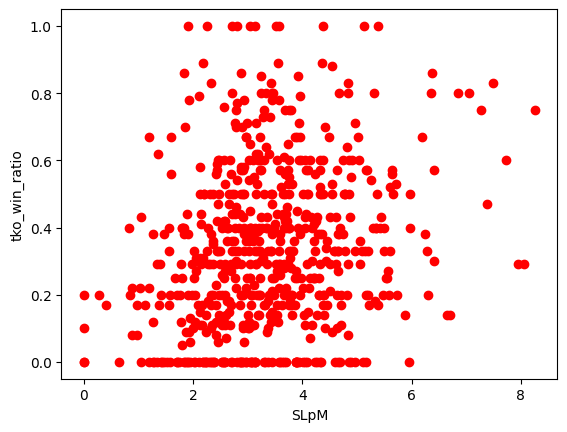

In [493]:

plt.scatter(df['SLpM'], df['tko_win_ratio'], c='red')
plt.xlabel('SLpM')
plt.ylabel('tko_win_ratio')
plt.show()

While this may appear to be a bit of a mess, as we can see, it is clear from the data that a SLpM > 0 is more likely to have a positive win ratio than one at 0, and the chance of having a ratio below 0.2 drops as SLpM increases. Past this point, it is a trend upward with quite a lot of noise. 

Next, we will run a one sample KS test to test our normality assumption. For this, we will use our SLpM column

In [494]:
kstest(df['SLpM'], 'norm')

KstestResult(statistic=0.8873965625579127, pvalue=0.0)

This suggests our SLpM data is not normally distributed. Let's try our tko_win_ratio data

In [495]:
kstest(df['tko_win_ratio'], 'norm')

KstestResult(statistic=0.5, pvalue=1.256634113139556e-146)

This is also nearly certainly not normally distributed. Our assumption of normality does not hold. While both our parametric and non-parametric methods produced the same conclusions (i.e: a significant relationship exists), our non-parametric methods are ultimately more reliable as our data does not conform to the assumptions of either of our parametric tests. The shared conclusion can likely be attributed to the sheer strength of the correlation in the data. 

Next, let's do simple linear regression on the data: 

In [496]:
reg = LinearRegression()
x = df[['SLpM']]
y = df['tko_win_ratio']
reg.fit(x, y)

LinearRegression()

In [497]:
print(reg.coef_)

[0.04300176]


As we can see, the correlation coefficient predicted by linear regression is quite a bit weaker than that predicted above. This makes sense, especially given all the "noise" in the data and linear regression's functional urge to find patterns in a linear manner, which allows for predictions. Linear regression generally is more appropriate to use when one wishes to make predictions with their model, as opposed to using correlation, which is good for determining direction of a relationship between two variables, with much less predictive power. 

Now, let's read in a new dataset related to biology. The following dataset was retrieved from Kaggle. It can be downloaded here: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/

In [498]:
hdf = pd.read_csv('heart_failure_clinical_records_dataset.csv', header=0)
hdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


As we can see, there are far more than the required 4-6 quantitative and 1 categorical column. We will begin by trimming our dataset by dropping a few columns we do not need for this assignment: 

In [499]:
dropcols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'time', 'smoking']
hdf = hdf.drop(columns=dropcols)
hdf = hdf.dropna() #Drop any and all incomplete entries from the dataset
hdf

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,75.0,582,20,265000.00,1.9,130,1
1,55.0,7861,38,263358.03,1.1,136,1
2,65.0,146,20,162000.00,1.3,129,1
3,50.0,111,20,210000.00,1.9,137,1
4,65.0,160,20,327000.00,2.7,116,1
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,0
295,55.0,1820,38,270000.00,1.2,139,0
296,45.0,2060,60,742000.00,0.8,138,0
297,45.0,2413,38,140000.00,1.4,140,0


This should prove a bit more simple to work with, with DEATH_EVENT as our target column. Next, we will scale our data: 

In [500]:
scaler = MinMaxScaler()
X = hdf[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]
y = hdf['DEATH_EVENT']
X_scaled = scaler.fit_transform(X.to_numpy())
X_scaled = pd.DataFrame(X_scaled, columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'])
hdf = X_scaled.join(y)
hdf

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,1
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,1
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,1
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,1
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,1
...,...,...,...,...,...,...,...
294,0.400000,0.004848,0.363636,0.157474,0.067416,0.857143,0
295,0.272727,0.229268,0.363636,0.296884,0.078652,0.742857,0
296,0.090909,0.259888,0.696970,0.869075,0.033708,0.714286,0
297,0.090909,0.304925,0.363636,0.139290,0.101124,0.771429,0


Next, we will run our Manova: 

In [501]:
fit = MANOVA.from_formula('age + creatinine_phosphokinase + ejection_fraction + platelets + serum_creatinine + serum_sodium ~ DEATH_EVENT', data=hdf)
print(fit.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0336 6.0000 292.0000 1400.1875 0.0000
         Pillai's trace  0.9664 6.0000 292.0000 1400.1875 0.0000
 Hotelling-Lawley trace 28.7710 6.0000 292.0000 1400.1875 0.0000
    Roy's greatest root 28.7710 6.0000 292.0000 1400.1875 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         DEATH_EVENT       Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.7771 6.0000 292.0000 13.9576 0.0000
            Pillai's trace 0.2229 6.0000 292.

From these results, we can see that our Death event is correlated to all of the numeric factors that we left in the dataset as a whole, given that our P value for our Pillai's trace, and all other factors, are less than 0.01. This implies that the combination of our predictor variables is significantly correlated with a death event. 

Next, we will perform multiple regression (Question 8). We will start by splitting our dataset into X and Y 

In [502]:
X = hdf[['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]
y = hdf['age']

In [503]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

Now we will print out our regression coefficients to see which serves as the best predictor and how they predict. 

In [504]:
coefficients = dict(zip(X.columns, list(regression.coef_)))
coefficients

{'creatinine_phosphokinase': -0.12883313007317573,
 'ejection_fraction': 0.0793144511288601,
 'platelets': -0.08697383215685368,
 'serum_creatinine': 0.28416439037399616,
 'serum_sodium': -0.03653873033359814}

We see from this that age, creatinine_phosphokinase, and serum creatinine are our positive predictors, while ejection_fraction, platelets, and serum_sodium serve as our negative predictors. In other words, to use one example, our likelihood of a death event increases scaled to our age by 0.505 per scaled unit of age, while our likelihood of death likewise decreases for our negative predictors. It would seem that based on our scaled data, our serum_creatinine levels are the strongest indicator of a death event, with a positive coefficient of nearly 1 #change

Next, we will create a composite variable for our data (Question 10): As per the inviolable instructions from the professor, we will be combining our serum_sodium and serum_creatinine into a composite variable as a predictor for age. 

In [505]:
composite_list = []
i = 0
for value in hdf['serum_creatinine']:
    value = value + hdf['serum_sodium'][i]
    i += 1
    composite_list.append(value)
temp = pd.DataFrame(composite_list, columns=['serum_macros'])
hdf = hdf.join(temp)
hdf


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT,serum_macros
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,1,0.643018
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,1,0.724559
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,1,0.547030
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,1,0.843018
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,1,0.332905
...,...,...,...,...,...,...,...,...
294,0.400000,0.004848,0.363636,0.157474,0.067416,0.857143,0,0.924559
295,0.272727,0.229268,0.363636,0.296884,0.078652,0.742857,0,0.821509
296,0.090909,0.259888,0.696970,0.869075,0.033708,0.714286,0,0.747994
297,0.090909,0.304925,0.363636,0.139290,0.101124,0.771429,0,0.872552


Now we have a new column representing our total serum macronutrients (sodium + creatinine) following scaling. Note that this variable likely has no real world application, but we are using it regardless as it is interesting. 

In [506]:
ancova(data=hdf, dv='serum_creatinine', covar='serum_macros', between='DEATH_EVENT')

,Source,SS,DF,F,p-unc,np2
0,DEATH_EVENT,0.267212,1,34.11297,1.367944e-08,0.103337
1,serum_macros,1.359012,1,173.49512,1.695978e-31,0.369536
2,Residual,2.318610,296,NaN,NaN,NaN


With a p-uncorrected value well below any reasonable threshold for significance, this shows us that using scaled data, there is a clear difference in serum_creatinine levels in those who suffered a death event and those who did not even when controlling for total concentration of measured macromolecules in serum. 

Next, let's compare t-tests for regular vs corrupted iris data (Q11):

In [507]:
#First, we have to read in our data and make sure it all goes in well
c_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
irisdf = pd.read_csv('iris_csv.data', header=0)
irisdf.columns = c_names
irisdf

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


This process works for this file, but we have some different extentions up ahead

In [508]:
bgnoisedf = pd.read_csv('iris_tab_bgnoise.txt', sep='\t')
bgnoisedf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.733378,3.507525,1.812936,0.825700,setosa
1,5.069510,3.068743,1.532503,0.532729,setosa
2,4.809006,4.036619,2.036262,1.117841,setosa
3,5.087062,3.398344,2.013369,1.091545,setosa
4,5.994396,3.765543,2.279670,0.284661,setosa
...,...,...,...,...,...
145,7.485415,3.770656,5.640401,2.460707,virginica
146,7.081660,3.026894,5.393984,2.529377,virginica
147,7.480969,3.635989,5.730516,2.431469,virginica
148,6.779089,4.151602,5.421454,3.284071,virginica


In [509]:
nonsetdf = pd.read_csv('iris_tab_no_setosa.txt', sep='\t')
nonsetdf

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


In [510]:
smnoisedf = pd.read_csv('iris_tab_smnoise.txt', sep='\t')
smnoisedf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.181901,3.538803,1.459311,0.267186,setosa
1,4.932139,3.026482,1.477291,0.245272,setosa
2,4.723676,3.229340,1.322704,0.224661,setosa
3,4.627270,3.189908,1.502322,0.212407,setosa
4,5.045986,3.666004,1.493921,0.250533,setosa
...,...,...,...,...,...
145,6.702652,3.057924,5.294822,2.393570,virginica
146,6.304243,2.579034,5.059779,1.945883,virginica
147,6.550409,3.043817,5.246304,2.051239,virginica
148,6.234849,3.420586,5.462914,2.366299,virginica


Now that we have read in every dataframe, let's compare sepal_length/width for each file to keep things simple: 

In [511]:
summary, results = rp.ttest(group1=irisdf['sepal_length'], group1_name='Sepal Length',
                            group2=irisdf['sepal_width'], group2_name='Sepal Width')
print(summary)

       Variable      N      Mean        SD        SE  95% Conf.  Interval
0  Sepal Length  149.0  5.848322  0.828594  0.067881   5.714181  5.982463
1   Sepal Width  149.0  3.051007  0.433499  0.035514   2.980827  3.121186
2      combined  298.0  4.449664  1.548742  0.089716   4.273104  4.626224


Ok, now let's compare this to our corrupted sets: 

In [512]:
#Start with out bgnoise df
summary, results = rp.ttest(group1=bgnoisedf['sepal_length'], group1_name='Sepal Length',
                            group2=bgnoisedf['sepal_width'], group2_name='Sepal Width')
print(summary)

       Variable      N      Mean        SD        SE  95% Conf.  Interval
0  Sepal Length  150.0  6.355740  0.908427  0.074173   6.209174  6.502307
1   Sepal Width  150.0  3.541210  0.516562  0.042177   3.457867  3.624552
2      combined  300.0  4.948475  1.590984  0.091856   4.767710  5.129240


Overall this actually looks quite similar. As far as general trends go, it seems just about every value increased slightly in response to the noise. Now let's see how our smnoise df does: 

In [513]:
summary, results = rp.ttest(group1=smnoisedf['sepal_length'], group1_name='Sepal Length',
                            group2=smnoisedf['sepal_width'], group2_name='Sepal Width')
print(summary)

       Variable      N      Mean        SD        SE  95% Conf.  Interval
0  Sepal Length  150.0  5.889008  0.831054  0.067855   5.754925  6.023091
1   Sepal Width  150.0  3.109071  0.435243  0.035537   3.038849  3.179294
2      combined  300.0  4.499040  1.541767  0.089014   4.323866  4.674213


Interestingly we note the same general trend as we see above, albeit less so with less noise. This makes sense. Now let's see what happens when a whole species is removed from the dataset with our nonsetdf: 

In [514]:
summary, results = rp.ttest(group1=nonsetdf['sepal_length'], group1_name='Sepal Length',
                            group2=nonsetdf['sepal_width'], group2_name='Sepal Width')
print(summary)

       Variable      N   Mean        SD        SE  95% Conf.  Interval
0  Sepal Length  100.0  6.262  0.662834  0.066283   6.130479  6.393521
1   Sepal Width  100.0  2.872  0.332751  0.033275   2.805975  2.938025
2      combined  200.0  4.567  1.777953  0.125720   4.319085  4.814915


Worth noting here that our SE amd SD values decreased a bit, but not much else changed much, save for our mean, which is closer to our big background noise mean. T-tests seem relatively resilient to changes in the data here accordingly



NOTE: This portion was written solely by Dr. Babbit***


Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.



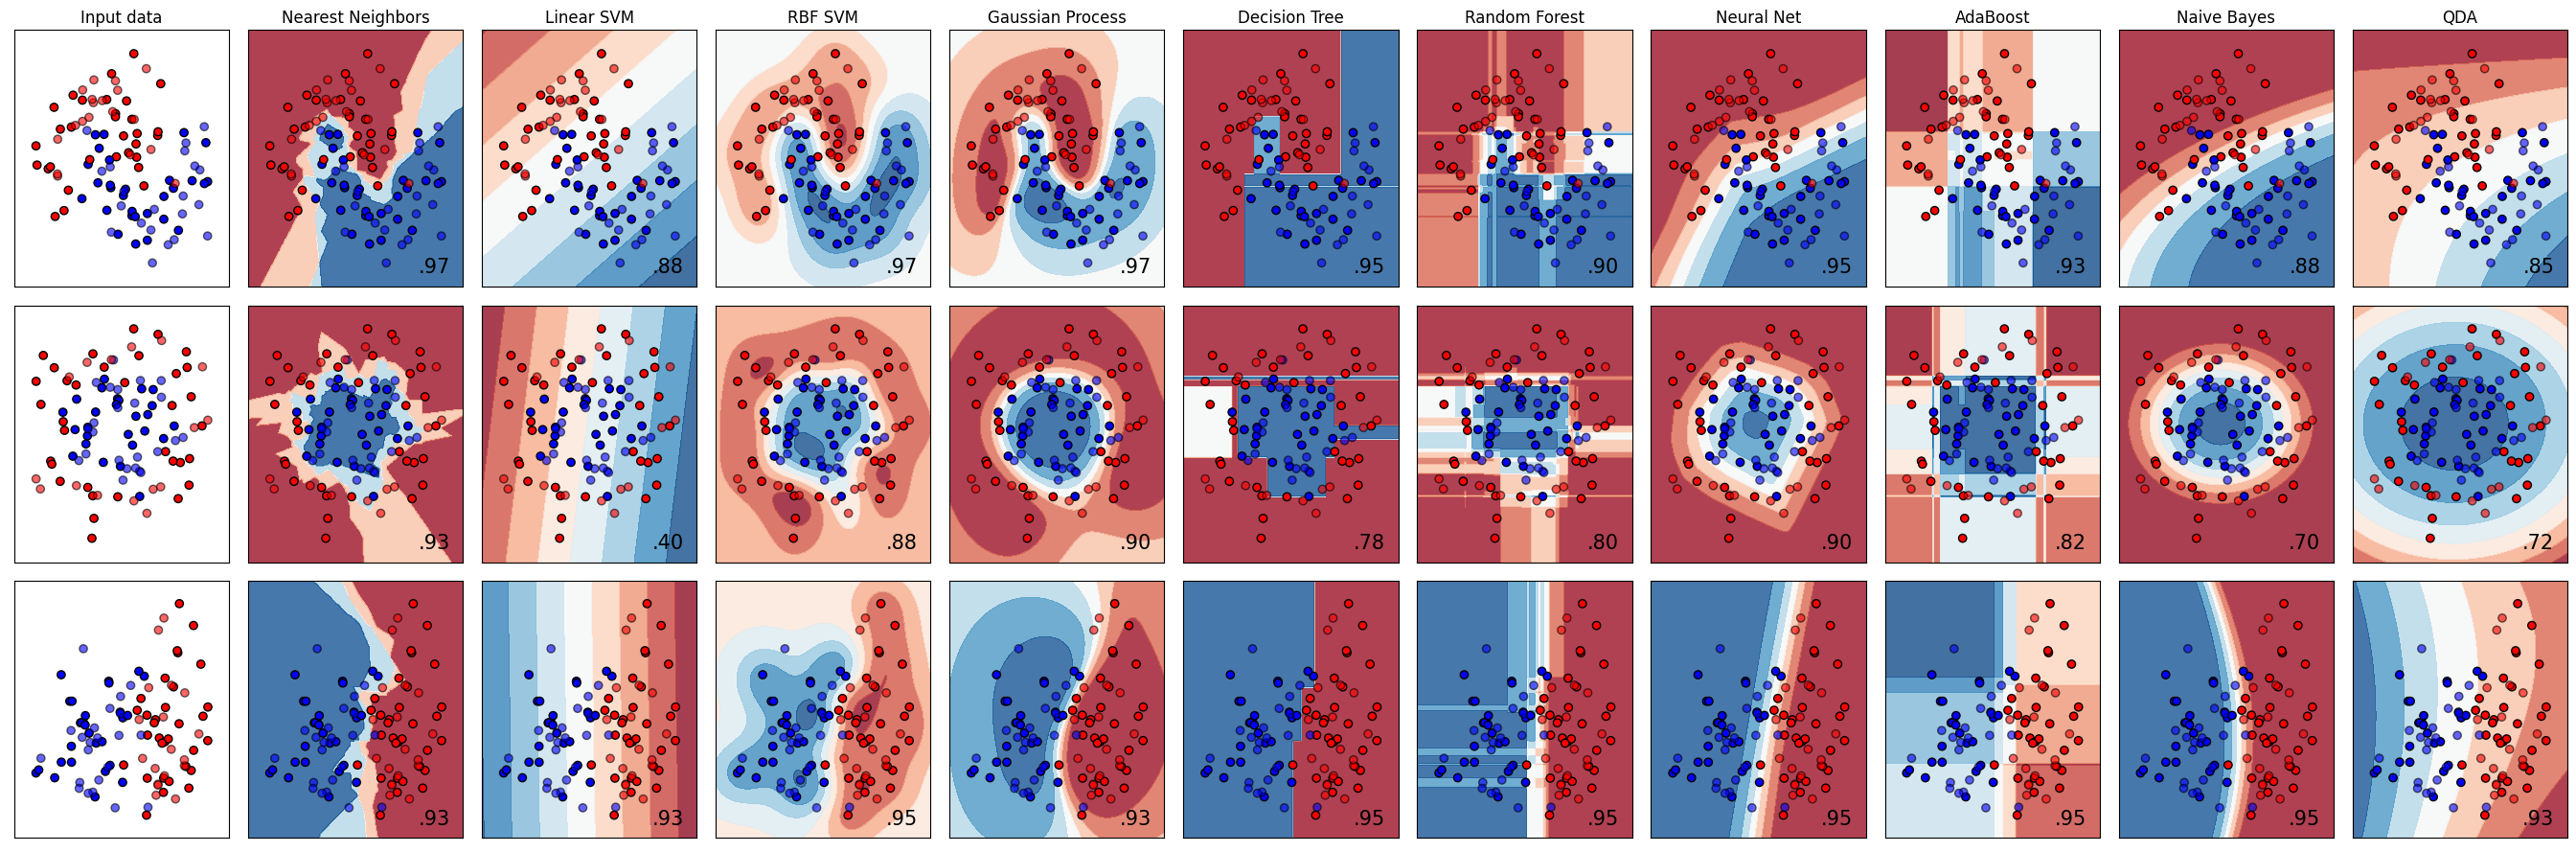

In [520]:
"""

NOTE: This portion was written solely by Dr. Babbit***


=====================
Classifier comparison
=====================

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.
"""
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)



datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

From this, it appears that our Nearest Neighbors and our Gaussian Process share the title for "best overall classifiers", as they appear to be the most accurate with the fewest false classifications in the area they choose. This is expected for nearest neighbors, which is known to fit to data well (and even overfit)